The goal of this notebook is to create numpy array that can be loaded and that have the correct colors.

Three arrays are created, all with the colors in RGB format (1000x1000xRGB):
- canvas_final, that is the final canvas directly from the dataset, i.e. taking the last pixed placed at each position
- canvas_final_img, that is the final canvas from the png file
- canvas_corr, that is the corrected canvas from the png file

In addition, there are three other canvases created for convenience with an the color idx replacing the RGB, i.e. 1000x1000 array with values rangin from 0 to 15, these are identified with the suffix _idx

In [2]:
from scipy import misc, sparse
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from skimage import io
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
# Utils

colorsHex = [
    '#FFFFFF',
    '#E4E4E4',
    '#888888',
    '#222222',
    '#FFA7D1',
    '#E50000',
    '#E59500',
    '#A06A42',
    '#E5D900',
    '#94E044',
    '#02BE01',
    '#00E5F0',
    '#0083C7',
    '#0000EA',
    '#E04AFF',
    '#820080'
]


def HexToRGB(hexStr):
    return tuple(int(hexStr.strip('#')[i:i+2], 16) for i in (0, 2 ,4))

def RGBToHex(value):
    return ('#%02x%02x%02x' % (value[0], value[1], value[2])).upper()

def idxToHex(idx):
    return colorsHex[idx]

def idxToRGB(idx):
    return HexToRGB(colorsHex[idx])

def HexToIdx(hexStr):
    return colorsHex.index(hexStr)

def RGBToIdx(rgb):
    return HexToIdx(RGBToHex(rgb))

def showImage(image, size=(12,12), ax=None):
    if not ax:
        _, ax = plt.subplots(1,1, figsize=size)
    ax.imshow(image.transpose((1,0,2)), interpolation='nearest')
    ax.grid(False)
def saveArray(array, fileName):
    if not fileName.endswith(".npy"):
        fileName += ".npy"
    with open(fileName, 'wb') as outfile:
        np.save(outfile, array)
def loadArray(fileName):
    if not fileName.endswith(".npy"):
        fileName += ".npy"
    with open(fileName, 'rb') as inFile:
        return np.load(inFile)

In [3]:
dataset = pd.read_csv("dataset/tile_placements.csv")
dataset = dataset[(dataset['x_coordinate'] < 1000) & (dataset['y_coordinate'] < 1000)]
print(len(dataset))
dataset.head()

16556641


,ts,user,x_coordinate,y_coordinate,color
0,1491167838000,c2Md9m4QckH8M+lhNh9btgoiFDk=,326,258,0
1,1491171651000,5KjCuLCk/VTXBIgaszopYecZ3uU=,190,791,0
2,1491105072000,toyjOAoAZMtlGZ3hXm5/LYsi+iA=,1,753,0
3,1491235861000,TGENUMJ6VmaBRr8ae9yP0MWQ66g=,233,931,0
4,1491163179000,usR8PLvN90gdivTbszEqhvPcXI4=,526,663,0


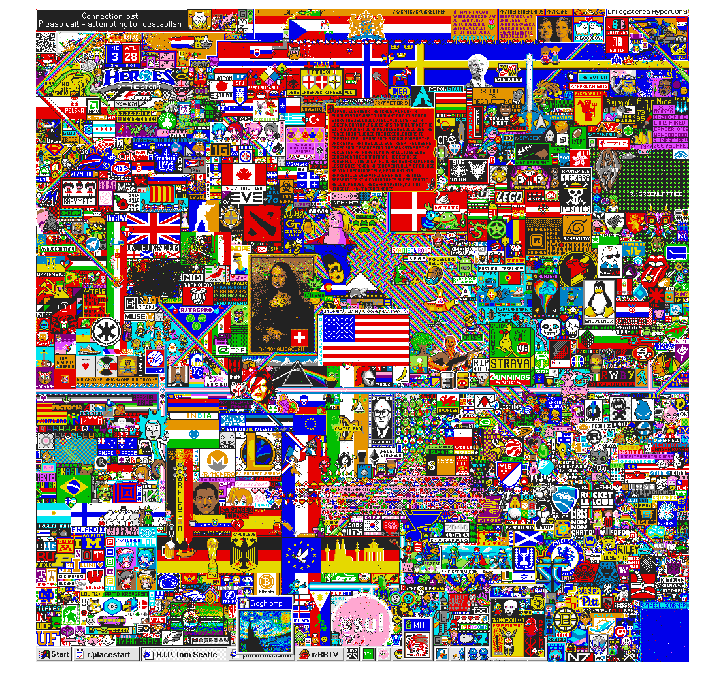

In [4]:
final_frame = dataset.sort_values(by=['x_coordinate', 'y_coordinate', 'ts'], ascending=False).drop_duplicates(subset=['x_coordinate', 'y_coordinate'])
canvas_final = np.ones((1000,1000, 3), dtype=np.int64)*255
for x, y, color in final_frame[['x_coordinate', 'y_coordinate', 'color']].values:
    canvas_final[x,y] = idxToRGB(color)
showImage(canvas_final)
plt.axis('off');

All colors matching with final res? False
All colors matching with corrected res? False
All colors matching with final res? True
All colors matching with corrected res? True


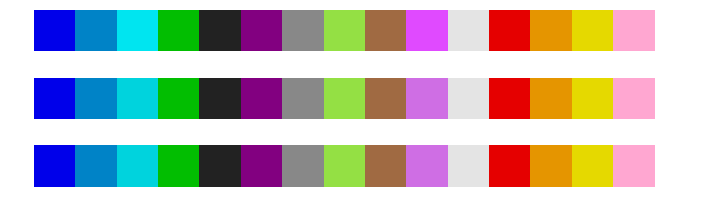

In [6]:
canvas_final_img = misc.imread("resources/canvaFinal.png", mode='RGB')
canvas_corr = misc.imread("resources/canvaCorrected.png", mode='RGB')

canvas_final_hex = np.apply_along_axis(RGBToHex, 2, canvas_final)
canvas_final_colors = np.array([HexToRGB(color) for color in np.unique(canvas_final_hex)])

canvas_final_img_hex = np.apply_along_axis(RGBToHex, 2, canvas_final_img)
canvas_final_img_colors = np.array([HexToRGB(color) for color in np.unique(canvas_final_img_hex)])

canvas_corr_hex = np.apply_along_axis(RGBToHex, 2, canvas_corr)
canvas_corr_colors = np.array([HexToRGB(color) for color in np.unique(canvas_corr_hex)])

fig, axes = plt.subplots(3, 1, figsize=(12, 3))
for ax in axes:
    ax.axis('off')
showImage(canvas_final_colors.reshape(-1, 1, 3), ax=axes[0])
showImage(canvas_final_img_colors.reshape(-1, 1, 3), ax=axes[1])
showImage(canvas_corr_colors.reshape(-1, 1, 3), ax=axes[2])

plt.tight_layout();

print('All colors matching with final res?', (canvas_final_colors == canvas_final_img_colors).all())
print('All colors matching with corrected res?', (canvas_final_colors == canvas_corr_colors).all())

mismatch_final = {RGBToHex(bad_color) : RGBToHex(good_color) for bad_color, good_color in zip(canvas_final_img_colors, canvas_final_colors)}
mismatch_corr = {RGBToHex(bad_color) : RGBToHex(good_color) for bad_color, good_color in zip(canvas_corr_colors, canvas_final_colors)}
canvas_final_img_hex = np.vectorize(mismatch_final.get)(canvas_final_img_hex)
canvas_corr_hex  = np.vectorize(mismatch_corr.get)(canvas_corr_hex)

canvas_final_img_colors = np.array([HexToRGB(color) for color in np.unique(canvas_final_img_hex)])
canvas_corr_colors = np.array([HexToRGB(color) for color in np.unique(canvas_corr_hex)])

print('All colors matching with final res?', (canvas_final_colors == canvas_final_img_colors).all())
print('All colors matching with corrected res?', (canvas_final_colors == canvas_corr_colors).all())

canvas_final_idx = np.vectorize(HexToIdx)(canvas_final_hex)

canvas_corr_idx = np.vectorize(HexToIdx)(canvas_corr_hex)

canvas_final_img_idx = np.vectorize(HexToIdx)(canvas_final_img_hex)